In [28]:
import sys
from importlib import reload 
sys.path.append('./lib')

In [29]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [30]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [31]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [32]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [42]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances(for_ranking=True):
    return [
        ProductDistances([
            (10, Distances("wips", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("wips", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("wips", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("wips", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("wips", scalable=True))
        ], "sum"),
    ]

def make_distances_2(for_ranking=True):
    n = "triple_trainable_l1_sq_ex_corrected" if for_ranking else "triple_trainable_l1_sq_ex"
    return [
        ProductDistances([
            (10, Distances(n, scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances(n, scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances(n, scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances(n, scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances(n, scalable=True))
        ], "sum"),
    ]

_____________


In [102]:
with open("bg_20_700_0.05.edges", "w") as f:
    for i in range(20):
        for j in range(700):
            if np.random.random() > 0.95:
                f.write(f"{i} {20 + j}\n")

In [103]:
G, distances_matrix, r_matrix  = utils.get_dataset("bg_20_700_0.05.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/bg_20_700_0.05.edges
|V| = 432, |E| = 648


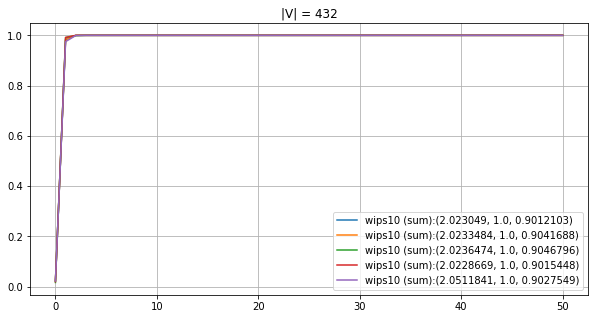

1.0	wips10 (sum)
1.0	wips10 (sum)
1.0	wips10 (sum)
1.0	wips10 (sum)
1.0	wips10 (sum)


In [104]:
total_loss_story_bgs_0_1 = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances(True), iters=1000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

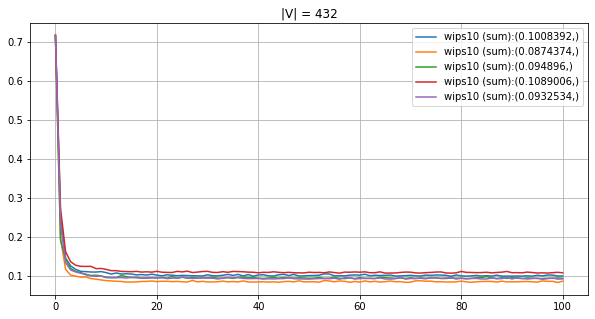

0.1008392	wips10 (sum)
0.0874374	wips10 (sum)
0.094896	wips10 (sum)
0.1089006	wips10 (sum)
0.0932534	wips10 (sum)


In [33]:
total_loss_story = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

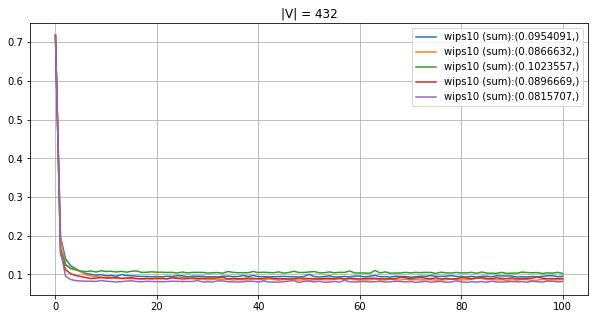

0.0954091	wips10 (sum)
0.0866632	wips10 (sum)
0.1023557	wips10 (sum)
0.0896669	wips10 (sum)
0.0815707	wips10 (sum)


In [37]:
total_loss_story_0_10 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

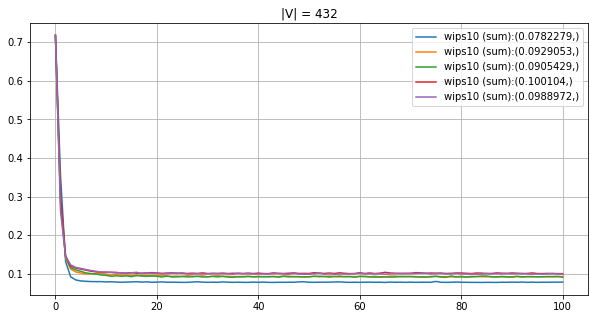

0.0782279	wips10 (sum)
0.0929053	wips10 (sum)
0.0905429	wips10 (sum)
0.100104	wips10 (sum)
0.0988972	wips10 (sum)


In [38]:
total_loss_story_0_05 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances(), 2000, learning_rate=0.05,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

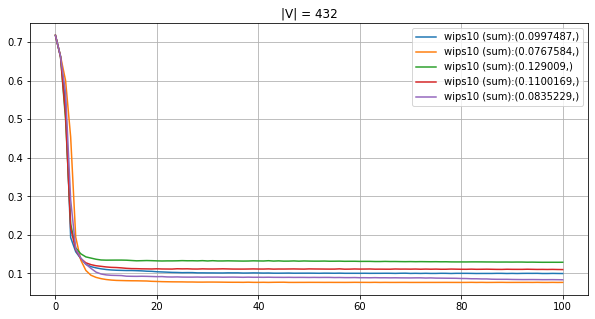

0.0997487	wips10 (sum)
0.0767584	wips10 (sum)
0.129009	wips10 (sum)
0.1100169	wips10 (sum)
0.0835229	wips10 (sum)


In [39]:
total_loss_story_0_01 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances(), 2000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

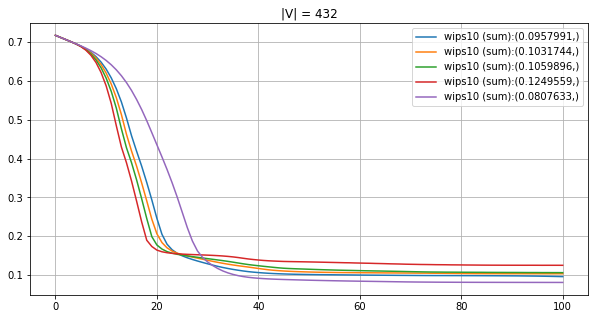

0.0957991	wips10 (sum)
0.1031744	wips10 (sum)
0.1059896	wips10 (sum)
0.1249559	wips10 (sum)
0.0807633	wips10 (sum)


In [40]:
total_loss_story_0_001 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances(), 2000, learning_rate=0.001,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [83]:
l = [total_loss_story_0_10, total_loss_story_0_05, total_loss_story_0_01, total_loss_story_0_001]
for l_i in l:
    vs = np.array(l_i).reshape((5, 101))[:, -1]
    print(vs.mean(), vs.min(), vs.std(), vs.mean() + vs.std())

0.09113312 0.0815707 0.007180531581547428 0.09831365158154742
0.09213545999999999 0.0782279 0.007820075238666185 0.09995553523866617
0.09981118000000001 0.0767584 0.018726516217962168 0.11853769621796217
0.10213646000000001 0.0807633 0.014377934130966103 0.11651439413096612


In [84]:
l = [total_loss_story_2_0_10, total_loss_story_2_0_05, total_loss_story_2_0_01]
for l_i in l:
    vs = np.array(l_i).reshape((5, 101))[:, -1]
    print(vs.mean(), vs.min(), vs.std(), vs.mean() + vs.std())

0.07107734 0.0688372 0.0018199163031304472 0.07289725630313044
0.07417844 0.0708914 0.0019279536784891915 0.07610639367848919
0.15145252 0.1512392 0.00018143193103751295 0.15163395193103751


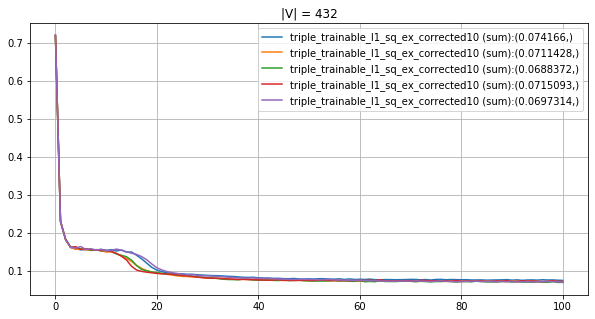

0.074166	triple_trainable_l1_sq_ex_corrected10 (sum)
0.0711428	triple_trainable_l1_sq_ex_corrected10 (sum)
0.0688372	triple_trainable_l1_sq_ex_corrected10 (sum)
0.0715093	triple_trainable_l1_sq_ex_corrected10 (sum)
0.0697314	triple_trainable_l1_sq_ex_corrected10 (sum)


In [44]:
total_loss_story_2_0_10 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances_2(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

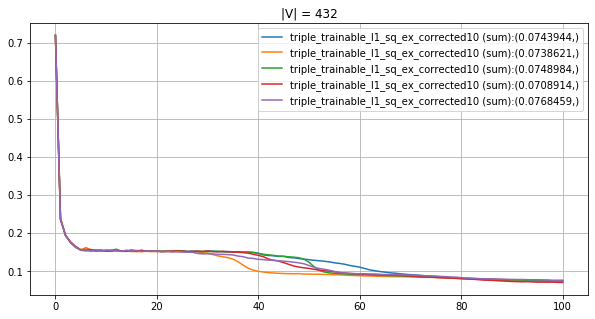

0.0743944	triple_trainable_l1_sq_ex_corrected10 (sum)
0.0738621	triple_trainable_l1_sq_ex_corrected10 (sum)
0.0748984	triple_trainable_l1_sq_ex_corrected10 (sum)
0.0708914	triple_trainable_l1_sq_ex_corrected10 (sum)
0.0768459	triple_trainable_l1_sq_ex_corrected10 (sum)


In [45]:
total_loss_story_2_0_05 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances_2(), 2000, learning_rate=0.05,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

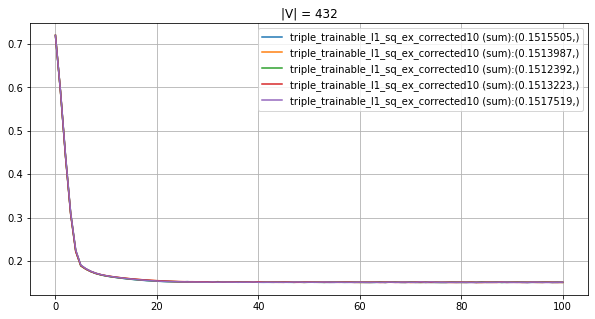

0.1515505	triple_trainable_l1_sq_ex_corrected10 (sum)
0.1513987	triple_trainable_l1_sq_ex_corrected10 (sum)
0.1512392	triple_trainable_l1_sq_ex_corrected10 (sum)
0.1513223	triple_trainable_l1_sq_ex_corrected10 (sum)
0.1517519	triple_trainable_l1_sq_ex_corrected10 (sum)


In [46]:
total_loss_story_2_0_01 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances_2(), 2000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

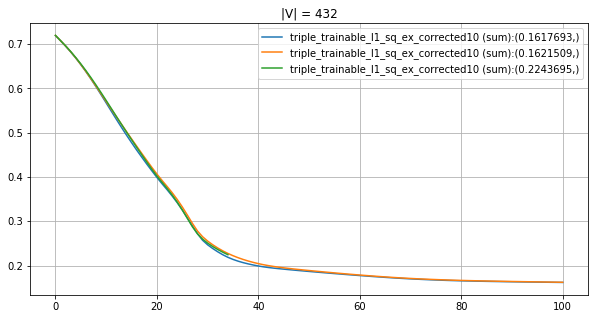

681:0.2241036322672574
682:0.22383932097443027
683:0.22357647030766326
684:0.22331495555579617


KeyboardInterrupt: 

In [47]:
total_loss_story_2_0_001 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances_2(), 2000, learning_rate=0.001,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

__________________

In [99]:
l = [total_loss_story_s_0_1, total_loss_story_s_0_05, total_loss_story_s_0_01]
for l_i in l:
    vs = np.array(l_i)[:, -1, 1]
    print(vs.mean(), vs.min(), vs.std(), vs.mean() + vs.std())

0.76347836 0.7393197 0.01629787428833587 0.7797762342883359
0.7679037999999999 0.7300035 0.026368341146154793 0.7942721411461547
0.7741763199999999 0.7342624 0.021169727389402065 0.795346047389402


In [98]:
l = [total_loss_story_s2_0_10, ]
for l_i in l:
    vs = np.array(l_i)[:, -1, 1]
    print(vs.mean(), vs.min(), vs.std(), vs.mean() + vs.std())

0.76712836 0.7398983 0.023371941283907086 0.790500301283907


In [101]:
G, distances_matrix, r_matrix  = utils.get_dataset("eu-core.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/eu-core.edges
|V| = 986, |E| = 16687


In [ ]:
total_loss_story_s_0_1 = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances(True), iters=1000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

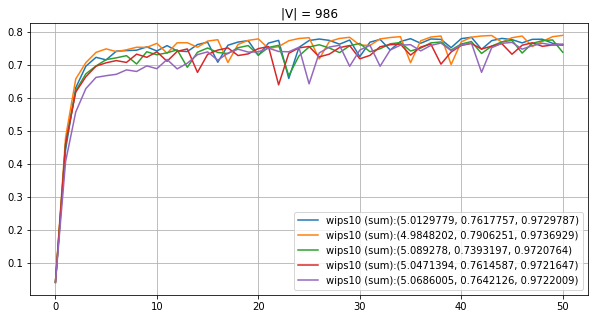

0.7617757	wips10 (sum)
0.7906251	wips10 (sum)
0.7393197	wips10 (sum)
0.7614587	wips10 (sum)
0.7642126	wips10 (sum)


In [58]:
total_loss_story_s_0_1 = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances(True), iters=1000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

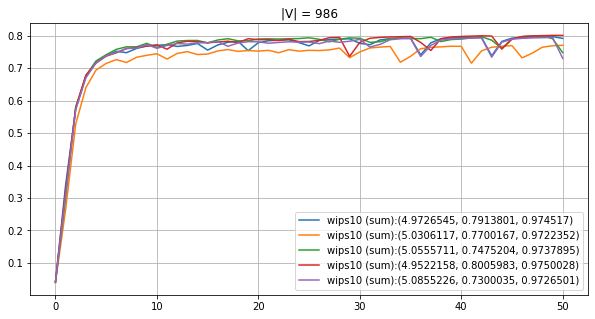

0.7913801	wips10 (sum)
0.7700167	wips10 (sum)
0.7475204	wips10 (sum)
0.8005983	wips10 (sum)
0.7300035	wips10 (sum)


In [59]:
total_loss_story_s_0_05 = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances(True), iters=1000, learning_rate=0.05,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

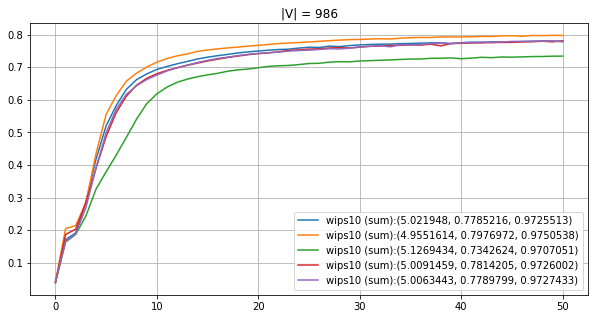

0.7785216	wips10 (sum)
0.7976972	wips10 (sum)
0.7342624	wips10 (sum)
0.7814205	wips10 (sum)
0.7789799	wips10 (sum)


In [60]:
total_loss_story_s_0_01 = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances(True), iters=1000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

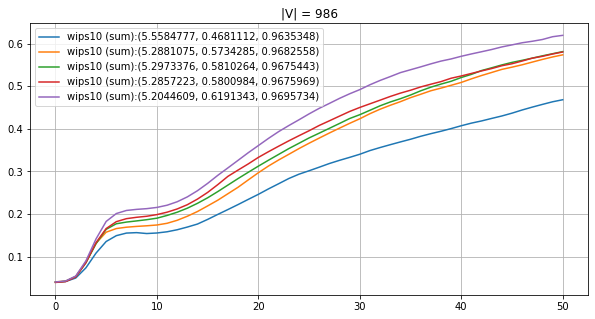

0.4681112	wips10 (sum)
0.5734285	wips10 (sum)
0.5810264	wips10 (sum)
0.5800984	wips10 (sum)
0.6191343	wips10 (sum)


In [61]:
total_loss_story_s_0_001 = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances(True), iters=1000, learning_rate=0.001,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

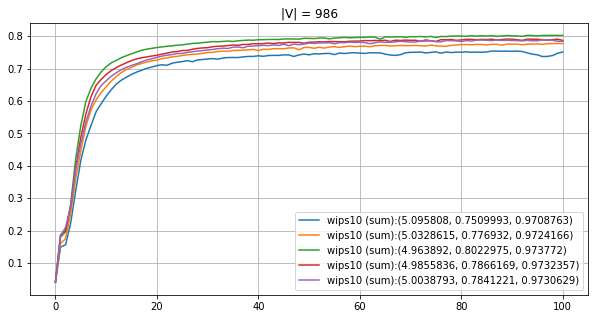

0.7509993	wips10 (sum)
0.776932	wips10 (sum)
0.8022975	wips10 (sum)
0.7866169	wips10 (sum)
0.7841221	wips10 (sum)


In [100]:
total_loss_story_2k_s_0_01 = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances(True), iters=2000, learning_rate=0.01,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

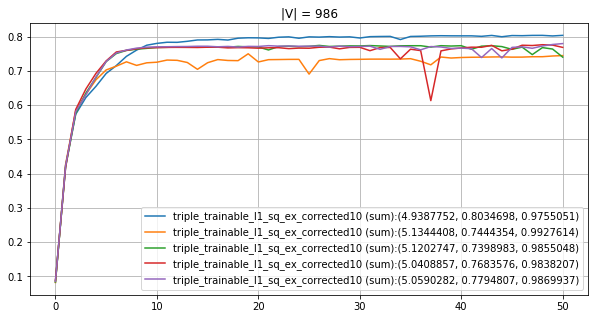

0.8034698	triple_trainable_l1_sq_ex_corrected10 (sum)
0.7444354	triple_trainable_l1_sq_ex_corrected10 (sum)
0.7398983	triple_trainable_l1_sq_ex_corrected10 (sum)
0.7683576	triple_trainable_l1_sq_ex_corrected10 (sum)
0.7794807	triple_trainable_l1_sq_ex_corrected10 (sum)


In [64]:
total_loss_story_s2_0_10 = utils.estimate_signatures_softmax(
    make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
    dists=make_distances_2(True), iters=1000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    print_results=True, different_d_sum=True
)

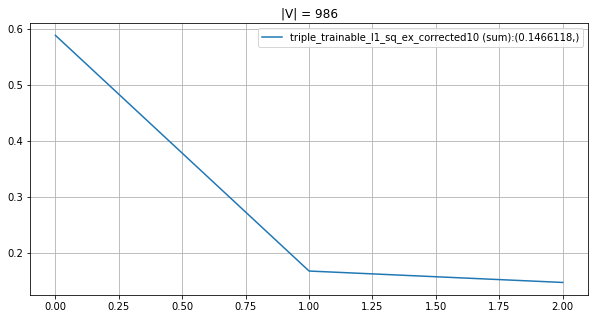

41:0.14775204900373728
42:0.14814644965081267
43:0.14512217564408783
44:0.14582267975356453
45:0.14556328116177872
46:0.14286871194591755
47:0.1443620591207524
48:0.14200171591300836


KeyboardInterrupt: 

In [62]:
total_loss_story_s_2_0_10 = utils.estimate_signatures_distortion(
    make_model_2, qs, distances_matrix, r_matrix,
    make_distances_2(), 2000, learning_rate=0.1,
    loss_eval_interval=20, draw_interval=20,
    different_d_sum=True, print_results=True
)

In [131]:
s_storyz = [total_loss_story_s1, total_loss_story_s2, total_loss_story_s3, total_loss_story_s4]
for d, l0, l1, l2, l3 in zip(make_distances()+make_distances_exp_dot(), *s_storyz):
    ar = np.array([x[-1] for x in [l0, l1, l2, l3]])
    # print(f"{ar[:, 0].argmin(), ar[:, 1:].argmax(axis=0)}\t{d}")
    print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

(3.9768824, 0.7658867, 0.9964608)	euclidian_corrected10 (sum)
(3.6061679, 0.8243482, 0.9968311)	triple_trainable_l0_corrected10 (sum)
(3.5519868, 0.8139393, 0.9968592)	triple_trainable_l1_sq_corrected10 (sum)
(3.6279522, 0.8031852, 0.9967019)	triple_trainable_l1_corrected10 (sum)
(2.9255792, 0.8626341, 0.9751032)	inverted_dot10 (sum)
(3.9770045, 0.7939634, 0.9967322)	H10 (sum)
(3.9746701, 0.6892885, 0.9958719)	S10 (sum)
(3.9315623, 0.7994768, 0.9967016)	H5,H5
(3.9220521, 0.7610009, 0.996615)	H2,H2,H2,H2,H2
(3.982686, 0.5217047, 0.9947025)	S5,S5
(4.3718392, 0.3336669, 0.9837141)	S2,S2,S2,S2,S2
(3.9424274, 0.7867102, 0.9962734)	S5,H5
(4.0136542, 0.4817409, 0.9941823)	S2,S2,H2,H2,E2
(2.0652683, 0.9916702, 0.9570999)	exp_minus_dot10 (sum)


In [132]:
storyz = [total_loss_story, total_loss_story_2, total_loss_story_3, total_loss_story_4]
for d, l0, l1, l2, l3 in zip(make_distances()+make_distances_exp_dot(), *storyz):
    ar = np.array([x[-1] for x in [l0, l1, l2, l3]])
    # print(f"{ar[:, 0].argmin(), ar[:, 1:].argmax(axis=0)}\t{d}")
    print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

(0.0938976,)	euclidian_corrected10 (sum)
(0.0943908,)	triple_trainable_l0_corrected10 (sum)
(0.091859,)	triple_trainable_l1_sq_corrected10 (sum)
(0.0818883,)	triple_trainable_l1_corrected10 (sum)
(0.0794567,)	inverted_dot10 (sum)
(0.0949658,)	H10 (sum)
(0.0998786,)	S10 (sum)
(0.089521,)	H5,H5
(0.086398,)	H2,H2,H2,H2,H2
(0.1072071,)	S5,S5
(0.1476837,)	S2,S2,S2,S2,S2
(0.0936723,)	S5,H5
(0.097779,)	S2,S2,H2,H2,E2
(0.0783554,)	exp_minus_dot10 (sum)


/home/shevkunov/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


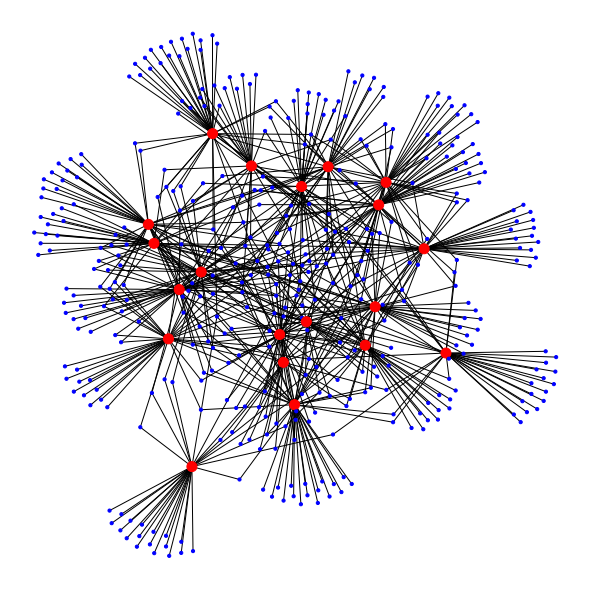

In [9]:
import networkx as nx
plt.figure(figsize=(8, 8))
nx.draw_spring(G,
    node_color=["red" if (x < 20) else "blue" for x in G.nodes()],
    node_size=[100 if (x < 20) else 10 for x in G.nodes()]
)
plt.savefig("bg.png")

In [138]:
G.edges()

EdgeView([(0, 53), (0, 79), (0, 110), (0, 112), (0, 122), (0, 123), (0, 177), (0, 252), (0, 289), (0, 293), (0, 300), (0, 311), (0, 330), (0, 344), (0, 353), (0, 359), (0, 386), (0, 395), (0, 477), (0, 492), (0, 493), (0, 527), (0, 546), (0, 550), (0, 581), (0, 588), (0, 598), (0, 613), (0, 646), (0, 680), (53, 18), (177, 3), (177, 4), (300, 2), (311, 13), (353, 17), (359, 8), (386, 14), (477, 11), (493, 12), (527, 3), (550, 4), (550, 8), (550, 12), (588, 5), (598, 16), (646, 14), (1, 31), (1, 85), (1, 102), (1, 115), (1, 144), (1, 206), (1, 209), (1, 216), (1, 225), (1, 239), (1, 257), (1, 259), (1, 262), (1, 266), (1, 286), (1, 338), (1, 346), (1, 361), (1, 398), (1, 452), (1, 474), (1, 485), (1, 508), (1, 531), (1, 533), (1, 540), (1, 572), (1, 578), (1, 585), (1, 611), (1, 612), (1, 624), (1, 643), (1, 669), (1, 683), (1, 710), (85, 14), (85, 18), (115, 16), (144, 13), (206, 4), (206, 9), (206, 13), (209, 13), (239, 4), (257, 15), (262, 6), (266, 12), (286, 13), (338, 6), (361, 9),

In [145]:
distances_matrix[3]

array([1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 6, 4, 6, 4, 4, 4, 4, 6, 6, 4, 6, 6,
       6, 4, 4, 6, 6, 6, 4, 4, 6, 6, 6, 6, 6, 4, 6, 4, 6, 4, 6, 6, 6, 6,
       6, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 4, 4, 6, 6, 6, 6, 6, 4, 4, 4, 6, 4, 4, 4, 4, 4, 6, 6, 4, 6, 4,
       6, 6, 5, 4, 4, 6, 4, 6, 4, 6, 6, 6, 6, 6, 6, 4, 6, 6, 4, 4, 6, 4,
       4, 6, 4, 6, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 6, 6, 4, 6, 6, 6, 6, 4, 4, 6,
       6, 5, 6, 6, 6, 6, 6, 4, 6, 6, 6, 4, 6, 6, 6, 4, 6, 4, 6, 4, 4, 4,
       6, 6, 4, 6, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [147]:
G.nodes()

NodeView((0, 53, 79, 110, 112, 122, 123, 177, 252, 289, 293, 300, 311, 330, 344, 353, 359, 386, 395, 477, 492, 493, 527, 546, 550, 581, 588, 598, 613, 646, 680, 1, 31, 85, 102, 115, 144, 206, 209, 216, 225, 239, 257, 259, 262, 266, 286, 338, 346, 361, 398, 452, 474, 485, 508, 531, 533, 540, 572, 578, 585, 611, 612, 624, 643, 669, 683, 710, 2, 28, 71, 97, 125, 132, 195, 260, 296, 301, 310, 315, 321, 366, 380, 402, 411, 431, 439, 465, 589, 591, 597, 599, 604, 625, 656, 658, 665, 690, 3, 68, 124, 145, 166, 181, 267, 285, 294, 302, 323, 335, 336, 390, 393, 396, 432, 440, 449, 468, 479, 520, 542, 557, 584, 629, 639, 649, 652, 659, 677, 688, 689, 4, 30, 55, 59, 236, 240, 247, 291, 299, 350, 404, 486, 491, 505, 509, 554, 577, 648, 695, 702, 705, 5, 50, 57, 63, 87, 104, 106, 128, 180, 194, 224, 269, 320, 367, 370, 372, 384, 399, 460, 462, 532, 565, 640, 651, 6, 39, 84, 95, 151, 196, 197, 203, 249, 292, 305, 340, 349, 362, 374, 387, 400, 421, 496, 559, 620, 627, 635, 676, 7, 35, 37, 47, 66, 80,